In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import sklearn as sk
import matplotlib.pylab as plt
import matplotlib as mpl

In [27]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

## 부트스트래핑

In [19]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                             coef=True, random_state=0)
coef

array(42.38550486)

In [20]:
dfX0 = pd.DataFrame(X0, columns=['X1'])
dfX = sm.add_constant(dfX0)           # 상수항결합
dfy = pd.DataFrame(y, columns=['y'])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [21]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

In [22]:
%%time
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

Wall time: 2.41 s


In [33]:
import warnings
warnings.filterwarnings("ignore")

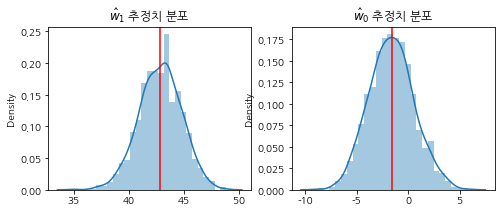

In [36]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')   #수직수평선
plt.title("$\hat{w}_1$ 추정치 분포")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$ 추정치 분포")
plt.show()

In [37]:
params_w1.mean(), params_w1.std()

(42.870864817934994, 1.9350074698299415)

In [38]:
params_w0.mean(), params_w0.std()

(-1.6227648904716474, 2.1701824215997902)

In [39]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           2.21e-36
Time:                        18:20:04   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4